# Shuffled Frog Leaping Algorithm - Python

## Introduction

This is an optimization algorithm which can be used to optimize any given mathematical model or equation. IT is derived from observing the movement of frogs while they search fro a food source. Frogs are divided into groups(called memeplexes) and take advantage from the knowledge of other groups. From each of the group the worst frog tries to improve its position inside the group which improves the overall group and ultimately the colony.

## Implementation

The implementation of this algorithm is done in python using a few third party libraries and is fairly optimized for speed.
The stack used for this is as given below:  
[Python3](https://www.python.org/) Main coding language  
[Numpy](http://www.numpy.org/) For vectorized mathematical processing  
[Matplotlib](https://matplotlib.org/) Graph plotting  
[Seaborn](https://seaborn.pydata.org/) Graph Styling(optional)
  
The environment for testing is:  
[Kubuntu 18.04](https://kubuntu.org/)

## Problem Description

This algorithm is used to optimize a mathematical function. The function to optimize is a simple function which calculates the euclidean distance from the origin. We try to minimize this function, it's global minimum lies at the origin i.e. 0. The function works for n-dimensional data but we use only 2-dimensional data for demonstration and testing.

## Algorithm Steps

### 1. Frog population sorting and division

First we need to initial n number of frogs to use. Then these frogs are divided into m number of memeplexes. For the global population of frogs we sort them into descending order of fitness. Their fitness is decided in this case, by the minimum distance to the origin.  
Then all these frogs are divided into memeplexes by their order of fitness, in a way that the top fitness frogs are in the memeplexes by their order. For example if there are 2 memeplexes, then the highest fitness frog is in memeplex 1, the 2nd fittest frog is in memeplex 2, 3rd fittest frog is again in memeplex 1 and so on.

### 2. Local search for each memeplex(group)

We perform a local search for all memeplexes individually for a number of iterations.

#### 2.1. Move worst frog w.r.t best frog

First we move the worst frog in the memeplex with respect to the best frog in it's own memeplex. The movement is given as $$ frog_{worst} = frog_{w} + (random * (frog_{best} - frog_{worst})$$ Where $random$ is a random selected number from $0$ to $1$  
Then we re-check it's fitness to see if it performs better than it's previous position. If not we try the next step, otherwise we select this position as the new position for the worst frog.

#### 2.2. Move worst frog w.r.t. greatest frog

If the previous step doesn't improve the fitness of the worst frog we then move the worst frog with respect the best frog in the overall population. The move is the same as before but with best frog replaced by greatest frog. $$ frog_{worst} = frog_{w} + (random * (frog_{greatest} - frog_{worst})$$ Where $random$ is a random selected number from $0$ to $1$  
Then we re-check it's fitness to see if it performs better than it's previous position. If not we try the next step, otherwise we select this position as the new position for the worst frog.

#### 2.3. Select random position

If both the above steps do not yield a better result we simply set the frog to a new random selected position.

### 3. Shuffle Memeplexes

We shuffle the memeplexes after the local search so that the frogs are redistributed between all the memplexes and this allows the memeplexes to improve based on the knowledge of the other memeplexes.

### 4. Termination condition

We can use any threshold for the termination condition of the search. In this implementation we use the number of iterations as the termination condition.

## Results

First we initialize the environment.

In [2]:
%matplotlib inline
from sfla import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

Then we run the algorithm

In [3]:
solun, frogs, memeplexes = sfla(opt_func, 100, 2, 1, 0, 5, 25, 50)

Finally we display the results

Optimal Solution (closest to zero): [0.09178866 0.06566641]


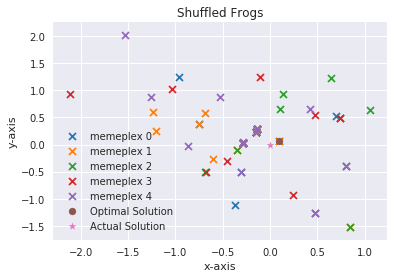

In [4]:
print("Optimal Solution (closest to zero): {}".format(solun))
# Place memeplexes
for idx, memeplex in enumerate(memeplexes):
    plt.scatter(frogs[memeplex, 0], frogs[memeplex, 1], marker='x', label="memeplex {}".format(idx))
plt.scatter(solun[0], solun[1], marker='o', label="Optimal Solution")
plt.scatter(0, 0, marker='*', label='Actual Solution')
# Plot properties
plt.legend()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Shuffled Frogs")
# Show plot
plt.show()